In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_excel(r"/content/Social_Network_Ads.xlsx")

In [ ]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [ ]:
df.isnull().sum()

,0
Age,0
Salary,0
Purchased,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df[['Age','Salary','Purchased']].corr()

,Age,Salary,Purchased
Age,1.000000,0.098741,0.566638
Salary,0.098741,1.000000,0.340323
Purchased,0.566638,0.340323,1.000000


In [ ]:
print(df.head())

   Age  Salary  Purchased
0   19   19000          0
1   35   20000          0
2   26   43000          0
3   47   25000          1
4   27   57000          0


In [ ]:
x=df[['Age','Salary']].values
y=df['Purchased'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.2,random_state=42)

In [ ]:
y_test.shape

(57,)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
accuracy_score = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
classification_report = classification_report(y_test, y_pred)

In [ ]:
print(accuracy_score)
print(confusion_matrix)
print(classification_report)

0.8245614035087719
[[28  4]
 [ 6 19]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.83      0.76      0.79        25

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



In [ ]:
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(x_set[:, 0].min() - 1, x_set[:, 0].max() + 1, 0.01),
                     np.arange(x_set[:, 1].min() - 1, x_set[:, 1].max() + 1, 0.01))

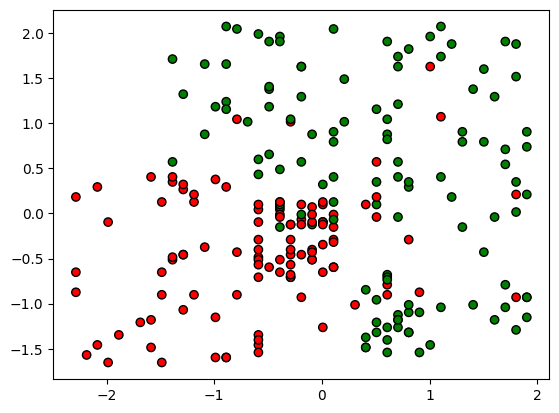

In [ ]:

plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green')))

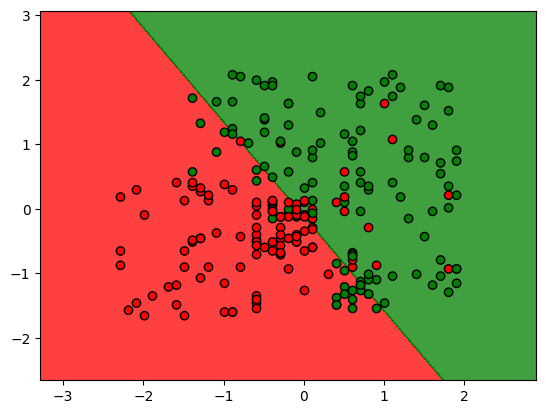

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(x_set[:, 0].min() - 1, x_set[:, 0].max() + 1, 0.01),
                     np.arange(x_set[:, 1].min() - 1, x_set[:, 1].max() + 1, 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green')))